In [1]:
import tensorflow as tf


In [2]:
# Checking whether GPU exist

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Implementing Simple Classifier using Keras's Sequential API

#### Dataset MNIST

* It's a dataset of handwritten digits and each datapoint is a 2D array of 28x28 size.
* It has 10 classes 0-9.
* Also known as "Hello World" for ANN

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
import os

In [3]:
f_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = f_mnist.load_data() 

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [5]:
X_test.shape , X_test.dtype

((10000, 28, 28), dtype('uint8'))

In [ ]:
y_train_full.shape , y_train_full.dtype

((60000,), dtype('uint8'))

In [6]:
y_test.shape , y_test.dtype

((10000,), dtype('uint8'))

In [7]:
X_train_full[:2]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [8]:
# Values lies between 0 & 255 so we normalizing it by dividing by 255

X_valid, X_train = X_train_full[:5000]/255. , X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]

X_test = X_test/255.

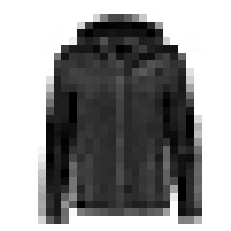

4

In [12]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()
y_train[0]

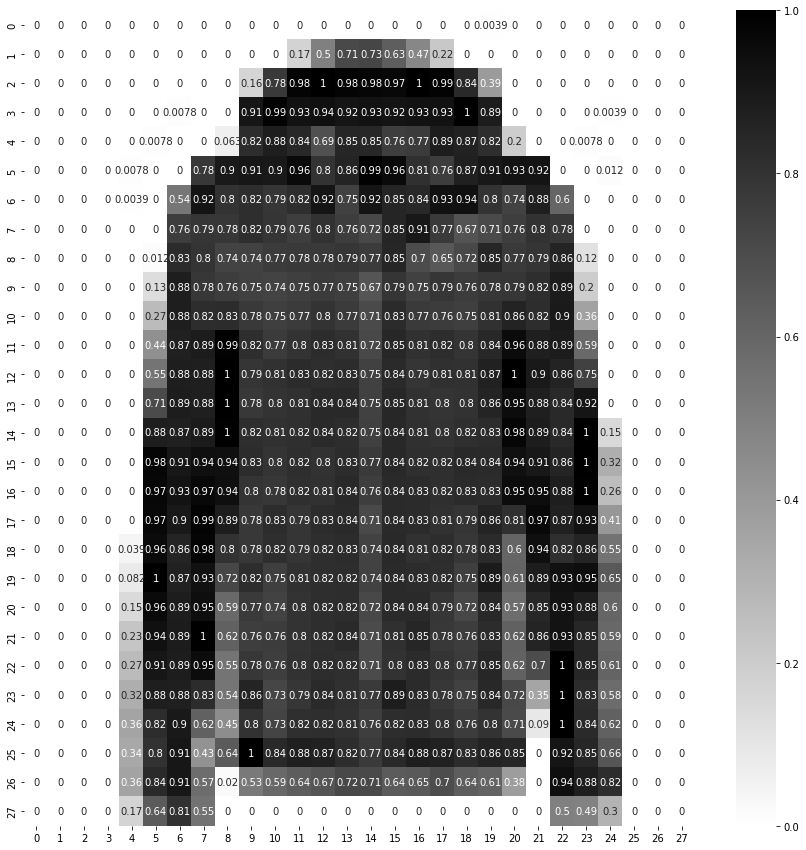

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

# The darker the region the higher the value 

### Our Next step is 

* **Flattening Operation** i.e. to convert 2D array (28,28) into 1D array (784).
* Each of 1D element will a input neuron of multilayer network. Total 784 units.
* Layer 1 will have 300 units
* Layer 2 will have 100 units
* Layer 3 will have 10 units. Since we have 10 classes.
* We will be using ReLU activation function in first second layer.
* Lastly we will use Softmax Activation Function because we are working in multiclass classification problem.


In [14]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape=[28,28], name="inputLayer"),
    tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
    tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
    tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")
]

In [15]:
model = tf.keras.models.Sequential(LAYERS)

In [16]:
model.layers

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


* W1 = 784 x 300 + 300(bias) = 235,500
* W2 = 300 * 100 + 100(bias) = 30,100
* W3 = 100 * 10 + 10 = 1010

In [18]:
hidden1 = model.layers[1]

model.get_layer(hidden1.name)

In [19]:
# Checking weights of layer  and Bias too

hidden1.get_weights()

[array([[ 0.00730023, -0.05831243, -0.01997937, ...,  0.04432666,
         -0.04818814, -0.07207937],
        [ 0.03415479, -0.0210427 , -0.05318766, ...,  0.05049139,
          0.01208562, -0.01945144],
        [ 0.05154823, -0.01671333,  0.03166728, ...,  0.0202253 ,
         -0.00126033, -0.00779854],
        ...,
        [-0.01176385,  0.05914037, -0.04335525, ..., -0.03191269,
          0.05420922,  0.02993337],
        [-0.02716684,  0.05498414,  0.06978838, ..., -0.01879251,
          0.03551085, -0.04436317],
        [-0.07286221,  0.06944837,  0.01015254, ..., -0.01623806,
         -0.05044032,  0.04041806]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [20]:
weights, biases = hidden1.get_weights()

In [21]:
weights.shape , biases.shape

((784, 300), (300,))

### *loss_function(actual,pred)=error*





In [22]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"       # Return error which helps in reducing error
OPTIMIZER = "SGD"                                       # Algorithm which helps in updating weights
METRICS = ["accuracy"]                                  # We taking accuracy as metrics

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [24]:
EPOCHS = 5                                # Number of Iterations
VALIDATION_SET = (X_valid, y_valid)

# It will accumulate all the intermediate loss values
history =  model.fit(X_train, y_train, 
                     epochs=EPOCHS, 
                     validation_data=VALIDATION_SET)           

# Validation batch size is by default 32 and we are having 55000 datapoints.
# 55000 / 32 = 1719  , means it is updating weights for 1719 times
# Go for smaller batch_size in case of less RAM.

Epoch 1/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3399 - accuracy: 0.8783 - val_loss: 0.3593 - val_accuracy: 0.8716
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3309 - accuracy: 0.8819 - val_loss: 0.3564 - val_accuracy: 0.8710
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3229 - accuracy: 0.8841 - val_loss: 0.3350 - val_accuracy: 0.8832
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3146 - accuracy: 0.8877 - val_loss: 0.3304 - val_accuracy: 0.8822
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3071 - accuracy: 0.8897 - val_loss: 0.3330 - val_accuracy: 0.8806


# Model Evaluation

In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3642 - accuracy: 0.8682


[0.3642485439777374, 0.8682000041007996]

# Save Model

In [ ]:
model.save("model.h5")

In [ ]:
# load_model = tf.keras.models.load_model("model.h5")

## Checking Values

In [26]:
pd.DataFrame(history.history)

loss  accuracy  val_loss  val_accuracy
0  0.339947  0.878255  0.359313        0.8716
1  0.330888  0.881909  0.356423        0.8710
2  0.322851  0.884055  0.334958        0.8832
3  0.314568  0.887727  0.330403        0.8822
4  0.307055  0.889745  0.332967        0.8806

In [28]:
X_new = X_test[:3]
y_new = y_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)                           # Giving softmax outcome. It will predict highest value

1/1 [==============================] - 0s 81ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.08, 0.  , 0.9 ],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [29]:
y_pred = np.argmax(y_proba, axis=-1)
y_pred , y_new                              # Predicted and Actual value

(array([9, 2, 1]), array([9, 2, 1], dtype=uint8))

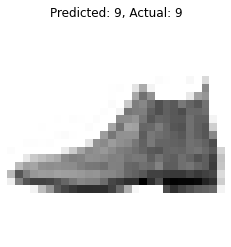

------------------------------------------------------------


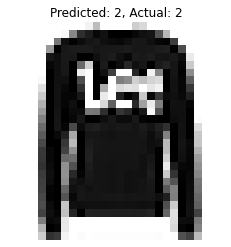

------------------------------------------------------------


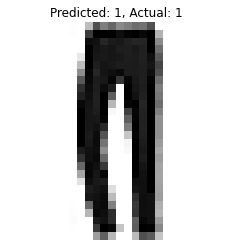

------------------------------------------------------------


In [30]:
for data, pred, actual in zip(X_new, y_pred, y_new):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis("off")
    plt.show()
    print("---"*20)

## BN Approach 1

In [31]:
del model

In [32]:
LAYER_BN_ONE = [
    tf.keras.layers.Flatten(input_shape=[28,28], name="inputLayer"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),
]

In [33]:
model = tf.keras.models.Sequential(LAYER_BN_ONE)

In [34]:
model.layers

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

In [36]:
BN_params = sum([784*4, 300*4, 100*4])
BN_params

4736

In [37]:
Trainable_BN_params = sum([784*4, 300*4, 100*4])/2
Trainable_BN_params     # Gamma, Beta

2368.0

In [38]:
Non_Trainable_BN_params = BN_params - Trainable_BN_params
Non_Trainable_BN_params        ## Mean , Std. Dev

2368.0

In [39]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"       # Return error which helps in reducing error
OPTIMIZER = "SGD"                                       # Algorithm which helps in updating weights
METRICS = ["accuracy"]                                  # We taking accuracy as metrics

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [40]:
EPOCHS = 5                                # Number of Iterations
VALIDATION_SET = (X_valid, y_valid)

# It will accumulate all the intermediate loss values
history =  model.fit(X_train, y_train, 
                     epochs=EPOCHS, 
                     validation_data=VALIDATION_SET)   

Epoch 1/5
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5349 - accuracy: 0.8123 - val_loss: 0.3755 - val_accuracy: 0.8670
Epoch 2/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3958 - accuracy: 0.8589 - val_loss: 0.3495 - val_accuracy: 0.8728
Epoch 3/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3538 - accuracy: 0.8726 - val_loss: 0.3240 - val_accuracy: 0.8842
Epoch 4/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3275 - accuracy: 0.8818 - val_loss: 0.3185 - val_accuracy: 0.8820
Epoch 5/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3084 - accuracy: 0.8889 - val_loss: 0.3190 - val_accuracy: 0.8838


## BN Approach 2

In [41]:
del model

In [42]:
LAYER_BN_TWO = [
    tf.keras.layers.Flatten(input_shape=[28,28], name="inputLayer"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, name="hiddenLayer1"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(100,  name="hiddenLayer2"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),
]

In [45]:
model = tf.keras.models.Sequential(LAYER_BN_TWO)

In [46]:
model.layers

In [47]:
BN_layer_1 = model.layers[1]
BN_layer_1

In [48]:
for variable in BN_layer_1.variables:
  print(variable.name, variable.trainable)

batch_normalization_3/gamma:0 True
batch_normalization_3/beta:0 True
batch_normalization_3/moving_mean:0 False
batch_normalization_3/moving_variance:0 False


In [49]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"       # Return error which helps in reducing error
OPTIMIZER = "SGD"                                       # Algorithm which helps in updating weights
METRICS = ["accuracy"]                                  # We taking accuracy as metrics

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [50]:
EPOCHS = 5                                # Number of Iterations
VALIDATION_SET = (X_valid, y_valid)

# It will accumulate all the intermediate loss values
history =  model.fit(X_train, y_train, 
                     epochs=EPOCHS, 
                     validation_data=VALIDATION_SET)  

Epoch 1/5
1719/1719 [==============================] - 9s 4ms/step - loss: 0.5848 - accuracy: 0.8021 - val_loss: 0.3923 - val_accuracy: 0.8586
Epoch 2/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4113 - accuracy: 0.8555 - val_loss: 0.3578 - val_accuracy: 0.8714
Epoch 3/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3713 - accuracy: 0.8674 - val_loss: 0.3323 - val_accuracy: 0.8754
Epoch 4/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3437 - accuracy: 0.8777 - val_loss: 0.3303 - val_accuracy: 0.8820
Epoch 5/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3217 - accuracy: 0.8838 - val_loss: 0.3197 - val_accuracy: 0.8820
